# COMP3222/6246 Machine Learning Technologies (2019/20)
## Week 8 - Introduction to Tensorflow
This lab is an introduction to the Tensorflow library, a powerful tool to run machine learning algorithms in Python. The Tensorflow library is the backbone of the exercises you will find in lab 5 and lab 6. Its advantages include flexibility, parallel execution, and being a general framework for computation. On top of that, it is a good entry to put in your CV!
## 1. Installation
First of all, we need to import the library in Python. Some Python distributions have it included already, if yours does not, you can sidestep the issue and use [Google's Collaboratory environment](https://colab.research.google.com/). Still, it can be a good exercise to try and install it on your local machine. In Unix system's you can simply install it by:

```
pip3 install tensorflow
```

After the installation, run this short test to make sure everything is working:

In [1]:
import tensorflow as tf

x = tf.Variable(3, name="x")
y = tf.Variable(2, name="y")
z = tf.Variable(1, name="z")
g = x*y*z+x*x+z

session = tf.Session()
session.run(x.initializer)
session.run(y.initializer)
session.run(z.initializer)
result = session.run(g)
session.close()

print(result)

16


The code above creates a simple function of three variables, and then runs a Tensorflow session to compute the result.

*Exercise 1.1.* Modify the code above to compute the value of $f(x,y,z) = x^3 + y^2 + yz + 3$ with $x=-2$, $y=5$ and $z=1.2$

In [2]:
# Solution
import tensorflow as tf

x = tf.Variable(-2, dtype=tf.float32, name="x")
y = tf.Variable(5.0, name="y")
z = tf.Variable(1.2, name="z")
g = x*x*x+y*y+y*z+3

session = tf.Session()
session.run(x.initializer)
session.run(y.initializer)
session.run(z.initializer)
result = session.run(g)
session.close()

print(result)

26.0


## 2. Linear regression
In Tensorflow, we can easily define operations on whole arrays, matrices and multi-dimensional matrices (aka tensors). In this section, we look at a straightforward implementation of the vanilla linear regression algorithm.

Do you remember the boston house price dataset from lab 2? Let's load it again and do some regression!

In [3]:
import numpy as np
from sklearn.datasets import load_boston

# load the dataset
boston = load_boston()
m, n = boston.data.shape
boston_features = np.c_[np.ones((m,1)), boston.data]

# define the pseudo-inverse equation in tensorflow
X = tf.constant(boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
Xt = tf.transpose(X)
w = tf.matmul(tf.matrix_inverse(tf.matmul(Xt, X)), y)

# run the computation
with tf.Session() as sess:
    weights = w.eval()

ValueError: Dimensions must be equal, but are 14 and 506 for 'MatMul_1' (op: 'MatMul') with input shapes: [14,14], [506,1].

*Exercise 2.1.* The pseudo-inverse equation in the code above is wrong. Fix the error.

In [4]:
# Solution

X = tf.constant(boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
Xt = tf.transpose(X)
w = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(Xt, X)), Xt), y)

# run the computation
with tf.Session() as sess:
    weights = w.eval()

print(weights)

[[ 3.64556236e+01]
 [-1.08021215e-01]
 [ 4.64181527e-02]
 [ 2.05375552e-02]
 [ 2.68626690e+00]
 [-1.77639732e+01]
 [ 3.81015968e+00]
 [ 6.87364489e-04]
 [-1.47551513e+00]
 [ 3.06014806e-01]
 [-1.23324459e-02]
 [-9.52731133e-01]
 [ 9.31287464e-03]
 [-5.24735868e-01]]


*Exercise 2.2.* Modify the code above to compute some estimates over the training set. Print the training RMSE.

In [5]:
# Solution
import tensorflow as tf

predict = tf.matmul(X, w)
sq_error = tf.squared_difference(predict, y)
rmse = tf.math.sqrt(tf.reduce_mean(sq_error))

# run the computation
with tf.Session() as sess:
    RMSE = rmse.eval()

print(RMSE)

4.679191


From the examples seen so far, we can deduce that the Tensorflow library is designed around two phases. First, is the **declaration phase**, where we create all the variables and link them into a function. Internally, this generates a computation graph. Second, we create a Tensorflow session and we run the **actual computation**.
## 3. Gradient descent
When the number of features and the dataset are large, computing the pseudo-inverse can become computationally expensive. A more efficient approach is gradient descent, which consists in starting from a randomly selected point and slowly creeping toward the solution. Not only this approach is quick, but it generalises well beyond linear methods. In fact, this is the backbone of the many non-linear neural networks and deep learning algorithms that define the current state-of-the-art.

Here is an example of how to implement gradient descent in Tensorflow. In this case, the gradients are computed automagically by automatic differentiation. This is a quite fascinating computational technique that saves us from computing first-order derivatives with pen and paper. Have a look at the Wikipedia entry to know more about this topic.

In [6]:
n_steps = 1000
learn_rate = 0.001

X = tf.constant(boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
w = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0), name="w")
y_hat = tf.matmul(X, w, name="y_hat")
error = y_hat - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [w])[0]
train_step = tf.assign(w, w - learn_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        if step % 50 == 0:
            print("Step", step, "MSE =", mse.eval())
        sess.run(train_step)
    
    w_best = w.eval()

Step 0 MSE = 119747.79
Step 50 MSE = nan
Step 100 MSE = nan
Step 150 MSE = nan
Step 200 MSE = nan
Step 250 MSE = nan
Step 300 MSE = nan
Step 350 MSE = nan
Step 400 MSE = nan
Step 450 MSE = nan
Step 500 MSE = nan
Step 550 MSE = nan
Step 600 MSE = nan
Step 650 MSE = nan
Step 700 MSE = nan
Step 750 MSE = nan
Step 800 MSE = nan
Step 850 MSE = nan
Step 900 MSE = nan
Step 950 MSE = nan


*Exercise 3.1.* Add comments to the code above. Do you understand the purpose of each line?

In [7]:
# Partial solution
# (Please have a look on the online API documentation. They are very useful.)

n_steps = 1000 # number of training epochs
learn_rate = 0.001 # learning rate (see how it's used to update weight below)

X = tf.constant(boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
w = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0), name="w") # get a random tensor with uniform distribution
y_hat = tf.matmul(X, w, name="y_hat") 
error = y_hat - y
mse = tf.reduce_mean(tf.square(error), name="mse") 

gradients = tf.gradients(mse, [w])[0] # compute a gradient of mse with respect to the weight vector
train_step = tf.assign(w, w - learn_rate * gradients) # compute and assign the new weight to w

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        if step % 50 == 0:
            print("Step", step, "MSE =", mse.eval())
        sess.run(train_step)
    
    w_best = w.eval()

Step 0 MSE = 227332.44
Step 50 MSE = nan
Step 100 MSE = nan
Step 150 MSE = nan
Step 200 MSE = nan
Step 250 MSE = nan
Step 300 MSE = nan
Step 350 MSE = nan
Step 400 MSE = nan
Step 450 MSE = nan
Step 500 MSE = nan
Step 550 MSE = nan
Step 600 MSE = nan
Step 650 MSE = nan
Step 700 MSE = nan
Step 750 MSE = nan
Step 800 MSE = nan
Step 850 MSE = nan
Step 900 MSE = nan
Step 950 MSE = nan


*Exercise 3.2.* The gradient descent algorithm is really sensitive to the value of the learning rate. Try changing it by a few orders of magnitude and run the algorithm again.

In [8]:
# Solution
n_steps = 200000
learn_rate = 0.001

X = tf.constant(boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
w = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0), name="w")
y_hat = tf.matmul(X, w, name="y_hat")
error = y_hat - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [w])[0]
train_step = tf.assign(w, w - learn_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        if step % 5000 == 0:
            print("Step", step, "MSE =", mse.eval())
        sess.run(train_step)
    
    w_best = w.eval()

Step 0 MSE = 160959.98
Step 5000 MSE = nan
Step 10000 MSE = nan
Step 15000 MSE = nan
Step 20000 MSE = nan
Step 25000 MSE = nan
Step 30000 MSE = nan
Step 35000 MSE = nan
Step 40000 MSE = nan
Step 45000 MSE = nan
Step 50000 MSE = nan
Step 55000 MSE = nan
Step 60000 MSE = nan
Step 65000 MSE = nan
Step 70000 MSE = nan
Step 75000 MSE = nan
Step 80000 MSE = nan
Step 85000 MSE = nan
Step 90000 MSE = nan
Step 95000 MSE = nan
Step 100000 MSE = nan
Step 105000 MSE = nan
Step 110000 MSE = nan
Step 115000 MSE = nan
Step 120000 MSE = nan
Step 125000 MSE = nan
Step 130000 MSE = nan
Step 135000 MSE = nan
Step 140000 MSE = nan
Step 145000 MSE = nan
Step 150000 MSE = nan
Step 155000 MSE = nan
Step 160000 MSE = nan
Step 165000 MSE = nan
Step 170000 MSE = nan
Step 175000 MSE = nan
Step 180000 MSE = nan
Step 185000 MSE = nan
Step 190000 MSE = nan
Step 195000 MSE = nan


*Exercise 3.3.* Perform some feature scaling on the dataset (see lab 2), and run the gradient descent algorithm again. Do you see any difference in the result? What about the number of steps needed to converge to the optimum?

In [9]:
# Solution (with StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(boston_features)
scaled_boston_features = scaler.transform(boston_features)

n_steps = 200000
learn_rate = 0.001

scaled_X = tf.constant(scaled_boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
w = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0), name="w")
y_hat = tf.matmul(scaled_X, w, name="y_hat")
error = y_hat - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [w])[0]
train_step = tf.assign(w, w - learn_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        if step % 5000 == 0:
            print("Step", step, "MSE =", mse.eval())
        sess.run(train_step)
    
    w_best = w.eval()

Step 0 MSE = 588.8034
Step 5000 MSE = 529.93774
Step 10000 MSE = 529.7044
Step 15000 MSE = 529.6451
Step 20000 MSE = 529.6286
Step 25000 MSE = 529.624
Step 30000 MSE = 529.6227
Step 35000 MSE = 529.62225
Step 40000 MSE = 529.62225
Step 45000 MSE = 529.6222
Step 50000 MSE = 529.6222
Step 55000 MSE = 529.6222
Step 60000 MSE = 529.62225
Step 65000 MSE = 529.6221
Step 70000 MSE = 529.6221
Step 75000 MSE = 529.6221
Step 80000 MSE = 529.6221
Step 85000 MSE = 529.6221
Step 90000 MSE = 529.6221
Step 95000 MSE = 529.6221
Step 100000 MSE = 529.6221
Step 105000 MSE = 529.6221
Step 110000 MSE = 529.6221
Step 115000 MSE = 529.6221
Step 120000 MSE = 529.6221
Step 125000 MSE = 529.6221
Step 130000 MSE = 529.6221
Step 135000 MSE = 529.6221
Step 140000 MSE = 529.6221
Step 145000 MSE = 529.6221
Step 150000 MSE = 529.6221
Step 155000 MSE = 529.6221
Step 160000 MSE = 529.6221
Step 165000 MSE = 529.6221
Step 170000 MSE = 529.6221
Step 175000 MSE = 529.6221
Step 180000 MSE = 529.6221
Step 185000 MSE = 529.6

In [10]:
# Solution (with MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(boston_features)
scaled_boston_features = scaler.transform(boston_features)

n_steps = 200000
learn_rate = 0.001

scaled_X = tf.constant(scaled_boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
w = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0), name="w")
y_hat = tf.matmul(scaled_X, w, name="y_hat")
error = y_hat - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [w])[0]
train_step = tf.assign(w, w - learn_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        if step % 5000 == 0:
            print("Step", step, "MSE =", mse.eval())
        sess.run(train_step)
    
    w_best = w.eval()

Step 0 MSE = 609.12445
Step 5000 MSE = 46.559822
Step 10000 MSE = 37.72247
Step 15000 MSE = 33.474915
Step 20000 MSE = 31.218117
Step 25000 MSE = 29.937883
Step 30000 MSE = 29.173481
Step 35000 MSE = 28.696602
Step 40000 MSE = 28.38676
Step 45000 MSE = 28.177408
Step 50000 MSE = 28.03053
Step 55000 MSE = 27.923773
Step 60000 MSE = 27.843622
Step 65000 MSE = 27.781767
Step 70000 MSE = 27.732798
Step 75000 MSE = 27.693335
Step 80000 MSE = 27.661036
Step 85000 MSE = 27.634295
Step 90000 MSE = 27.611856
Step 95000 MSE = 27.592995
Step 100000 MSE = 27.57697
Step 105000 MSE = 27.563313
Step 110000 MSE = 27.55155
Step 115000 MSE = 27.541542
Step 120000 MSE = 27.53283
Step 125000 MSE = 27.525372
Step 130000 MSE = 27.518795
Step 135000 MSE = 27.513226
Step 140000 MSE = 27.508333
Step 145000 MSE = 27.503998
Step 150000 MSE = 27.50026
Step 155000 MSE = 27.49704
Step 160000 MSE = 27.49418
Step 165000 MSE = 27.491657
Step 170000 MSE = 27.4894
Step 175000 MSE = 27.487436
Step 180000 MSE = 27.485743


## 4. Principal component analysis
In order to improve our familiarity with Tensorflow, we play with a different topic here. One of the main problem in machine learning is how to visualise multi-dimensional data. In the case of the boston house price dataset, we have 13 input features. Can we plot this 13-dimensional space on a 2-dimensional page somehow?

A possible solution is to use principal component analysis (PCA in short). This is an intriguing linear algebraic method that takes a cloud of multidimensional datapoints and create a new set of axes (aka components). The method extract the components that exhibit the largest variance in the data, thus spreading the datapoints as much as possible.

In the code below, we implement PCA using Tensorflow's built-in singular value decomposition algorithm (SVD):

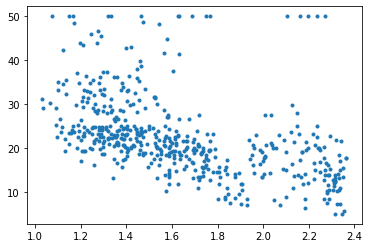

In [56]:
import matplotlib.pyplot as plt

s, u, v = tf.svd(X)
P_comp = tf.slice(v, [0, 0], [n + 1, 1])
X_proj = tf.matmul(X, P_comp)

with tf.Session() as sess:
    sess.run(X_proj)
    X_final = X_proj.eval()

plt.figure()
plt.plot(X_final, boston.target, ".")

*Exercise 4.1.* The code above plots the data along the first principal component. Modify the code to plot along the second.

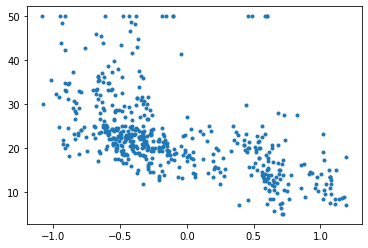

In [57]:
# Solution

P_comp2 = tf.slice(v, [0, 1], [n + 1, 1])
X_proj = tf.matmul(X, P_comp2)

with tf.Session() as sess:
    sess.run(X_proj)
    X_final = X_proj.eval()

plt.figure()
plt.plot(X_final, boston.target, ".")

*Exercise 4.2.* Does the result change if we perform feature scaling (see lab 2) before running the PCA algorithm?

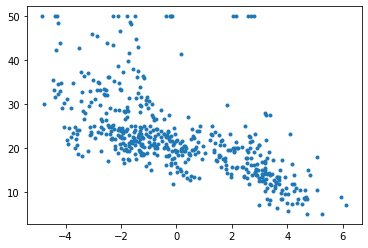

In [12]:
# Solution (with StandardScaler)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(boston_features)
scaled_boston_features = scaler.transform(boston_features)
scaled_X = tf.constant(scaled_boston_features, dtype=tf.float32, name="X")

s, u, v = tf.svd(scaled_X)
P_comp = tf.slice(v, [0, 0], [n + 1, 1])
X_proj = tf.matmul(scaled_X, P_comp)

with tf.Session() as sess:
    sess.run(X_proj)
    X_final = X_proj.eval()

plt.figure()
plt.plot(X_final, boston.target, ".")

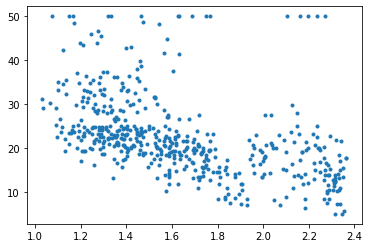

In [13]:
# Solution (with MaxMinScaler)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(boston_features)
scaled_boston_features = scaler.transform(boston_features)
scaled_X = tf.constant(scaled_boston_features, dtype=tf.float32, name="X")

s, u, v = tf.svd(scaled_X)
P_comp = tf.slice(v, [0, 0], [n + 1, 1])
X_proj = tf.matmul(scaled_X, P_comp)

with tf.Session() as sess:
    sess.run(X_proj)
    X_final = X_proj.eval()

plt.figure()
plt.plot(X_final, boston.target, ".")